In [1]:
import scipy as sp
import numpy as np
import scipy.sparse as sps
import scipy.sparse.linalg as spla

import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Лабораторная работа 2. SVD

**Внимание! Заданий много, но вам не обязательно делать все, даже чтобы получить синюю клетку**

Так что можете не делать их подряд, а сначала посмотреть все и выбрать те, которые вам больше нравятся.

## 1. Волшебные невязки (2 балла)

Сгенерируйте командой `scipy.linalg.hilbert` матрицу Гильберта размера $500\times500$. Назовём эту матрицу $A$. 

Возьмите вектор $z = (0,0,\ldots,0,1)\in\mathbb{R}^{500}$. Вычислите $b = Az$ и решите систему уравнений $Ax = b$ вашим любимым способом.

Теперь исказите вектор $b$ небольшой (по модулю не большей $0.0001$ по каждой координате) случайной ошибкой и для полученного вектора $b'$ решите систему $Ax = b'$ тем же самым способом.

Сравните невязки $||A\hat{x} - b||_2$ и $||A\hat{x}' - b'||_2$, где $\hat{x}$ и $\hat{x}'$ - полученные вами решения. Что из полученных результатов вас удивляет? Попробуйте объяснить эффект.

**Важно!** Баллы будут ставиться не за реализацию, а за объяснения!

In [2]:
A = sp.linalg.hilbert(500)
z = np.array([0] * 499 + [1])
b = A @ z
x = sp.linalg.solve(A, b)
b2 = b + np.random.rand(500) / 1e4
x2 = sp.linalg.solve(A, b2)
print('Ошибка в первом случае:  ', sp.linalg.norm(A @ x - b))
print('Ошибка в втором случае:  ', sp.linalg.norm(A @ x2 - b2))
print('Число обусловленности A: ', np.linalg.cond(A))

Ошибка в первом случае:   8.517853940710706e-15
Ошибка в втором случае:   0.14082296874807465
Число обусловленности A:  3.02585711846e+20


/opt/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.4008498900170262e-21
  ' condition number: {}'.format(rcond), RuntimeWarning)


Применим svd разложение к матрице гильберта, чтобы посмотреть, как распределены её сингулярные числа:

In [3]:
U, s, V = sp.linalg.svd(A)

[  2.37689651e+00   1.12535948e+00   4.05589572e-01   1.28586616e-01
   3.80165427e-02   1.07021704e-02   2.89607217e-03   7.57532243e-04
   1.92260364e-04   4.74773585e-05   1.14322439e-05   2.68893687e-06
   6.18669084e-07   1.39409218e-07   3.07986170e-08   6.67682139e-09
   1.42151574e-09   2.97428488e-10   6.11977738e-11   1.23896108e-11
   2.46932004e-12   4.84771697e-13   9.37970122e-14   1.78451139e-14
   3.36082804e-15   1.05555407e-15   4.97618173e-16   4.10886703e-16
   3.71298850e-16   2.60273854e-16]


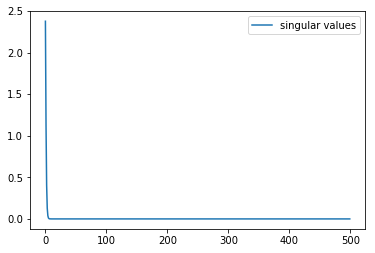

In [4]:
print(s[:30])
plt.plot(s, label='singular values')
plt.legend()
plt.show()

Видно, что первые порядка 20 сингулярных чисел много больше остальных. Посмотрим на вектор $b$ в системе, в которой матрица диагональна:

In [5]:
new_b = U.T @ b @ V.T

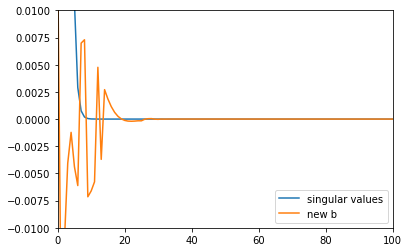

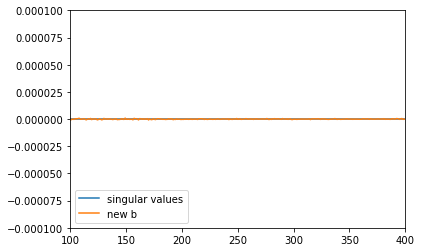

In [6]:
plt.axis((0, 100, -0.01, 0.01))
plt.plot(s, label='singular values')
plt.plot(new_b, label='new b')
plt.legend()
plt.show()
plt.axis((100, 400, -0.0001, 0.0001))
plt.plot(s, label='singular values')
plt.plot(new_b, label='new b')
plt.legend()
plt.show()

Видно, что наибольшие координаты вектора $b$ и наибольшие сингулярные значения матрицы $A$ приходятся на одни и те же направления. Теперь посмотрим на вектор $b_2$ на аналогичных графиках:

In [7]:
new_b2 = U.T @ b2 @ V.T

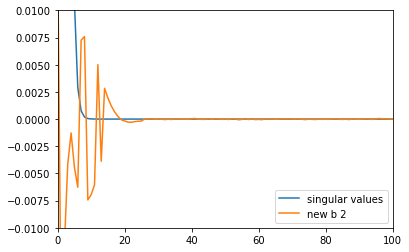

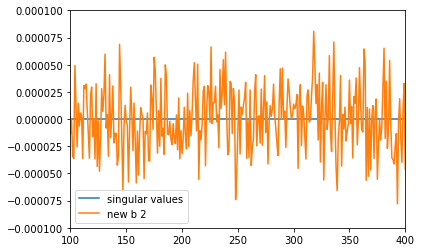

In [8]:
plt.axis((0, 100, -0.01, 0.01))
plt.plot(s, label='singular values')
plt.plot(new_b2, label='new b 2')
plt.legend()
plt.show()
plt.axis((100, 400, -0.0001, 0.0001))
plt.plot(s, label='singular values')
plt.plot(new_b2, label='new b 2')
plt.legend()
plt.show()

На первом графике кажется, что картинка не поменялась, однако на втором заметно, что вектор $b_2$ имеет достаточно большие по модулю координаты вдоль всех направлений.

Можно сделать вывод, что в первом случае модель "не знает" о плохой обусловленности матрицы $A$ -- её просто не волнуют плохие направления, поэтому ответ хороший. Во втором же случае эти направления становяться заметны.

## 2. Неожиданно теоретическая задача (2 балла)

Для двух заданных матриц $A$ и $B$ одного размера найдите ортогональную матрицу $Q$, для которой норма Фробениуса разности $||QA - B||_F$ минимальна.

$||QA - B||_F = \mathrm{tr}\left(\left(QA - B\right)\left(QA - B\right)^T\right) = 
    \mathrm{tr}\left(QAA^TQ^T - QAB^T - BA^TQ^T + BB^T\right) = \mathrm{tr}\left(AA^T+BB^T-2QAB^T\right) \rightarrow min$
    
$ \mathrm{tr}\left(QAB^T\right) \rightarrow max$

$ U \Sigma V^T = AB^T$ - svd for $AB^T$

$ \mathrm{tr}\left(QU \Sigma V^T\right) = \mathrm{tr}\left(V^TQU\Sigma \right)$

Поскольку $V^TQU$ ортогональная, то нормы столбцов матрицы $\Sigma$ равны нормам соответствующих столбцов матрицы $V^TQU\Sigma$, поэтому $\mathrm{tr}\left(V^TQU\Sigma \right) = \sum\left(V^TQU\Sigma\right)_{i i} \leq \sum\left\Vert\left(V^TQU\Sigma\right)_i\right\Vert = \sum\left\Vert\Sigma_i\right\Vert = \sum \Sigma_{i i} = \mathrm{tr}\left(V^TQU\Sigma\right)$

Равенство достигается, когда первые $r$ ($r$ = ранг $\Sigma$) столбцов матрицы $V^TQU$ совпадают со стобцами еденичной матрицы. Oстальные столбцы должны удовлетворять условию ортогональности. Обозначим такую марицу $\tilde {E_r}$.

$V^TQU = \tilde {E_r}$

$Q = V\tilde {E_r}U^T$

## 3. Сжатие информации с помощью SVD (3 балла)

Загрузите выложенную на странице курса фотографию вашего любимого куратора Сони.

Поскольку фотография чёрно-белая, её можно проинтерпетировать как матрицу, элементы которой - это насыщенность серого цвета каждого из пикселей. Постройте сингулярное разложение этой матрицы (не нужно центрировать данные!). 

Визуализуйте первую главную компоненту. Ожидали ли вы увидеть именно это? Почему?

Визуализуйте компонеты с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Сделайте выводы.

Как вам кажется, сколько первых компонент нужно взять для достаточно хорошего восстановления исходного изображения? Во сколько раз меньше памяти потребуется для их хранения?

**Важное замечание.** Главные компоненты - это не скрытые признаки, а матрицы вида $u^{(i)}\sigma_i(v^{(i)})^T$, где $u^{(i)}, v^{(i)}$ --- столбцы матриц $U$ и $V$ соответственно. В частности, сумма первых нескольких главных компонент --- это наилучшее приближение исходной матрицы матрицей данного ранга.

### Решение

Загрузим изображение

In [9]:
from PIL import Image
from scipy import misc


img = misc.imread(r'Sonya_small.jpg', mode='L') # это матрица из интенсивностей серого цвета; её уже можно подвергать SVD

Посмотрим на Соню!

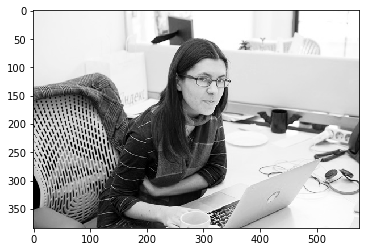

In [10]:
imgplot = plt.imshow(img, cmap='Greys_r')

In [11]:
U, S, V = sp.linalg.svd(img)

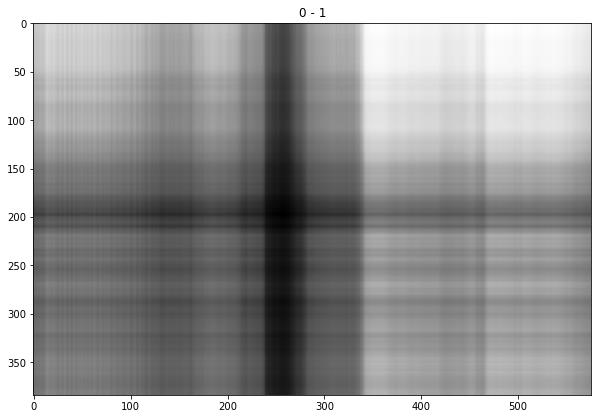

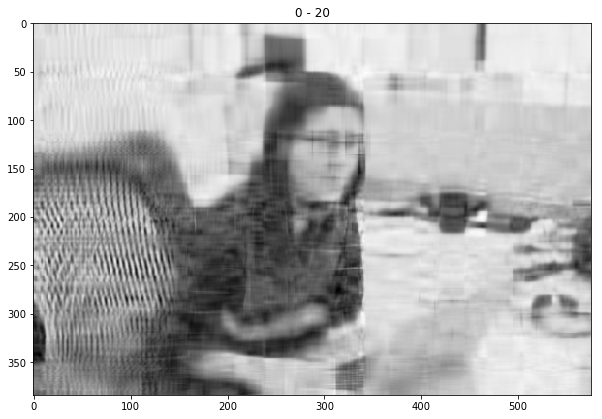

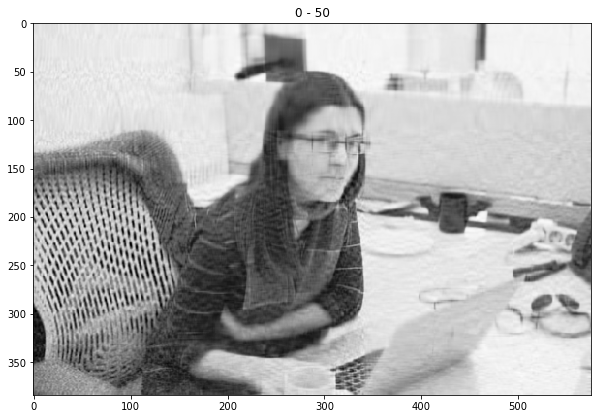

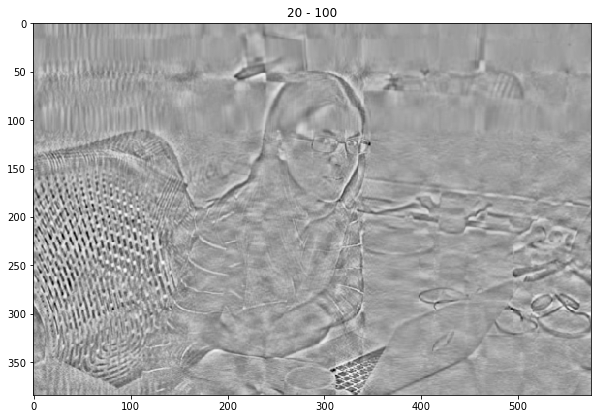

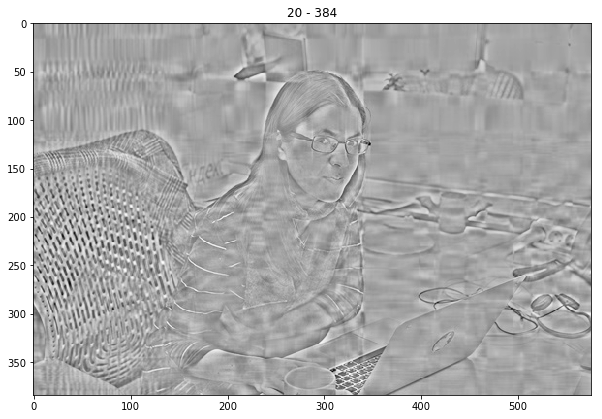

In [12]:
def show(begin, end):
    s = np.concatenate((np.zeros((begin,)), S[begin:end], np.zeros((384 - end,))))
    plt.figure(figsize=(10, 15))
    imgplot = plt.imshow(U @ sp.linalg.diagsvd(s, 384, 576) @ V, cmap='Greys_r')
    plt.title(str(begin) + ' - ' + str(end))
    plt.show()

show(0, 1)
show(0, 20)
show(0, 50)
show(20, 100)
show(20, 384)

Можно понять почему изображение для первой главной компоненты выглядит именно так, ведь она равна произведению столбца $u_1$ и строки $v_1^T$. Поэтому на картинке чётко видны вертикальные и горизонтальные направления.

Сравнив третье и последнее изображения можно заметить, что первые главные компоненты отвечают за интенсивность цвета, но дают грубое приближение, в то время как последнии компоненты несут в себе всю чёткость картинки. Кажется что первых 50 компонент уже достаточно для извлечения главной информации из картинки.

Если начальная картинка имела размеры $n$ на $m$, то для её хранения обычным способом потребуется $n\cdot m$ памяти. Если же хранить картинку с помощью $SVD$ разложения используя первые r сингулярных чисел потребуется $r\cdot(n+m)$ памяти. В данном случае при $n = 384, m = 576, r = 50$ получаем выйгрышь по памяти в $4.6$ раз.

## 4. SVD и свёртки (до 5 баллов)

В компьютерном зрении важную роль играет операция свёртки. Вообще говоря, сворачивать приходится не только матрицы, но и более сложные тензоры, однако в этом задании мы для простоты будем работать только с матрицами.

В этом задании мы будем считать, что индексы элементов в матрицах нумеруются с нуля.

Пусть $B$ --- матрица. *Свёртка* матрицы $A$ с ядром (или, как ещё говорят, с фильтром) $B$ - это матрица

$$(A * B)_{ij} = \sum_{p, q}a_{pq}b_{i - p, j - q}$$

Эту загадочную операцию можно проинтерпретировать следующим образом: для каждого элемента матрицы $A$ мы умножаем его "окрестность" (размеры этой окрестности зависят от размеров фильтра) поэлементно на соответствующие коэффициенты из ядра и всё это складываем:

<img src="http://colah.github.io/posts/2014-07-Understanding-Convolutions/img/RiverTrain-ImageConvDiagram.png">

Таким образом, каждый элемент $A$ мы как-то обновляем с учётом его соседей. Скажем, свёртка с ядром

$$B = \frac19\begin{pmatrix}
1 & 1 & 1\\
1 & 1 & 1\\
1 & 1 & 1
\end{pmatrix}$$

будет размывать изображение.

У вас может возникнуть вопрос: а что происходит на краях? Пусть $A$ - матрица $m\times n$, а $B$ - матрица $k\times l$. Есть разные варианты, например, такие:

- можно считать, что "за пределами" $A$ и $B$ тоже есть элементы, но просто они равны нулю; тогда результат свёртки будет иметь размер $(m + k - 1)\times(n + l - 1)$;
- можно точно так же считать, что элементы, лежащие "за пределами" $A$ и $B$ равны нулю, но законными считать только те компоненты свёртки, для которых "центр" фильтра попадает в матрицу $A$, тогда результат свёртки будет иметь такой же размер, как и $A$;
- можно считать законными только те компоненты свёртки, для которых фильтр целиком помещается "внутри" $A$; в этом случае результат свёртки будет меньшего размера, чем исходная матрица, а именно $(m - k + 1)\times(n - l + 1)$.

Дальше мы будем по умолчанию считать, что границы обрабатываются первым из указанных способов.

Свёртка называется *сепарабельной*, если она представляется в виде композиции свёрток

$$A * B = (A * U) * V,$$

где $U$ и $V$ - матрицы $(2t+1)\times1$ и $1\times(2s+1)$ (или $1\times(2s+1)$ и $(2t+1)\times1$).

**Собственно задание:**

0) Сверните фотографию Сони с фильтром

$$B = \begin{pmatrix}
-1 & -1 & -1\\
-1 & 8 & -1\\
-1 & -1 & -1
\end{pmatrix}$$

Границы можете обработать любым приятным вам способом. Как вам кажется, каков физический смысл этой операции?

1) Проверьте, что операция свёртки (в которой границы обрабатываются первым из указанных способов!) ассоциативна, то есть $(A * B) * C = A * (B * C)$;

2) Убедитесь, что сепарабельную свёртку можно посчитать быстрее, чем не сепарабельную;

3) Допустим, что вам нужно реализовать операцию свёртки с фильтром $B$, однако приоритетом для вас является скорее скорость, а не абсолютная точность, и поэтому вы готовы ценой не очень большой ошибки заменить исходную свёртку на какую-нибудь сепарабельную. Какую именно векторы $U$ и $V$ вы бы использовали в этом случае? Почему? Попробуйте оценить ошибку.

4) Докажите, что любую свёртку можно выполнить, используя лишь операции свёртки с векторами (векторами-строками и/или векторами-столбцами) и операцию сложения.

In [13]:
from itertools import product

B = np.array(((-1, -1, -1),
              (-1, 8, -1),
              (-1, -1, -1))
            )
print(B)
def apply(B, A):
    R = np.zeros(A.shape)
    for i, j in product(range(1, A.shape[0]-1), range(1, A.shape[1]-1)):
            R[i, j] = min(255, max(0, np.sum(A[np.ix_([i-1, i, i+1], [j-1, j, j+1])] * B)))
    return R
new_img = apply(B, img)

[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


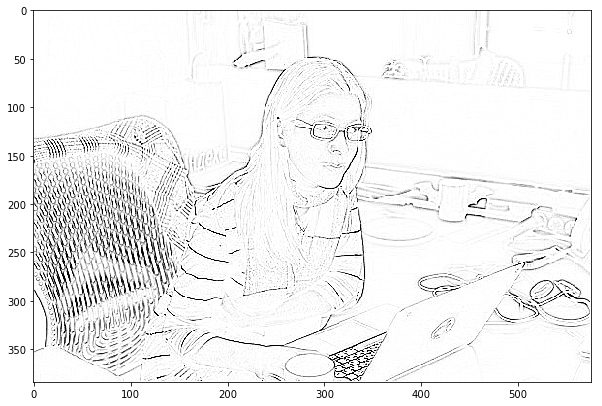

In [14]:
plt.figure(figsize=(10, 15))
imgplot = plt.imshow(255-new_img, cmap='Greys_r')

0) Как видно эта свёртка выделяет границы изображения

2) Для вычисления свёртки размером $(n\cdot m)$ нужно $O(nm)$ времени. Но если свёртка сепарабельна, то есть равна композиции свёрток размером $(n \cdot 1)$ и $(1 \cdot m)$ то её можно посчитать за $O(n + m)$, что при достаточно больших $n$ и $m$ будет быстрее

3) Известно что наилучшим приближением матрицы $B$, матрицей ранга $r$ является сумма $r$ первых главных компонент. Ошибку можно оценить как сумму квадратов сингулярных чисел начиная с $r+1$

4) Прямо следует из существования svd разложения для любой матрицы

## 5. Снижение размерности с помощью SVD (4 балла)

Загрузите со страницы курса файлы `messages_texts.txt`, `messages_features.txt` и `messages_vectorized.mtx`.

**Внимание!** Не пытайтесь открыть файл `messages_vectorized.txt` в блокноте или, тем более, распечатать его в IPython ноутбуке. Сначала посмотрите на его объём.

* `messages_texts.txt` содержит некоторое количество текстовых сообщений на английском языке. Сообщение номер k начинается с заголовка post_number_k.
* `messages_features.txt` содержит список пар `(слово, номер соответствующего признака)` для всех слов, которые содержатся в теле сообщений, кроме самых употребительных из списка `stopwords.words("english")`
* `messages_vectorized.mtx` содержит разреженную матрицу, содержащая индексы [tf-idf](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) всех слов из messages_features в каждом сообщении.

*Замечание* Не обязательно парсить файл `messages_texts.txt`; чтобы найти сообщение с нужным номером, вы можете просто воспользоваться поиском по файлу!

В этом задании вы попробуете представить сообщения векторами небольшой размерности. Идея вот в чём. Изначально каждое сообщение у нас представлена огромным количеством признаков: tf-idf индексами всех слов. SVD позволяет значительную часть информации собрать в нескольких новых признаках; тем самым, сообщения будут представлены достаточно короткими векторами.

Загрузите матрицу `messages_vectorized.mtx`. Поскольку она очень большая, не пытайтесь вычислять полное SVD; вместо этого воспользуйтесь функцией [scipy.linalg.svds](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.linalg.svds.html#scipy.sparse.linalg.svds), которая вычисляет $k$ старших сингулярных значений и векторов. Возьмите $k = 6$ и визуализуйте сообщения в пространстве первых трёх новых признаков. Какие геометричские особенности датасета становятся видны? Стоят ли за этим какие-то содержательные закономерности? Возможно, придётся запустить несколько раз, чтобы получилась хорошая картинка (а она действительно хорошая!).

Какой методологический недочёт был допущен при создании матрицы `messages_vectorized.mat`? Как он повлиял на поведение SVD?

Попытайтесь выяснить, какие из исходных признаков (то есть какие слова) вносят наибольший вклад в три новых признака.

Сравните результаты с тем, что получилось бы, если воспользоваться [случайными гауссовскими проекциями](http://scikit-learn.org/stable/modules/random_projection.html). Они вызываются следующими заклинаниями:

In [15]:
X = # Your matrix
transformer = random_projection.GaussianRandomProjection(n_components='''how many?''')
X_new = transformer.fit_transform(X)

SyntaxError: invalid syntax (<ipython-input-15-e7690c8bf12a>, line 1)

**Центрировать данные** можно с помощью функции `sklearn.preprocessing.scale`:

In [ ]:
from sklearn.preprocessing import scale
scale(X, with_mean = True, with_std=False, axis=0)

*P.S.* Если оперативная память вам позволит (кажется, 2Гб должно хватить), можете всё-таки попробовать сделать полное SVD и сравнить полученную картинку с той, что выдаёт `svds`.

In [ ]:
X = sp.io.mmread('messages_vectorized.mtx')
print(X.shape)
print(X.nnz)

In [ ]:
u, s, vt = sps.linalg.svds(X, )

In [ ]:
s

In [ ]:
B = u @ sp.linalg.diagsvd(s, 6, 6)

In [ ]:
np.var(B, axis = 0)

In [ ]:
new_x.shape

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


fig = pyplot.figure(figsize=(10, 6))
ax = Axes3D(fig)
ax.view_init(30, 20)
ax.scatter(B[:, 0], B[:, 1], B[:, 2], s=1)
pyplot.show()

## 6. Низкоранговые приближения своими руками (до 6 баллов)

В этой задаче вам предстоит поразмышлять о низкоранговых приближениях и об их месте в мироздании.

Везде ниже $||\cdot||_2$ --- это операторная $l_2$-норма.

Зафиксируем некоторое $\varepsilon > 0$. Найти низкоранговое приближение матрицы $A$ с точностью $\varepsilon$ --- значит найти такую матрицу $Q$ с $k = k(\varepsilon)$ ортонормированными столбцами, для которой
$$
\begin{matrix}
\phantom{AAAAAAAAAAAAAAAAA} &
||A - QQ^TA||_2 < \varepsilon & \phantom{AAAAAAAAAAAAaa}(1)\end{matrix}$$
В этом случае линейная оболочка столбцов матрицы $Q$ является в каком-то смысле приближённым образом $A$.

Если ранг $k$ нам из каких-то соображений известен, то можно воспользоваться, например, сингулярным разложением. А если нет? Есть несколько способов этот ранг найти; мы предлагаем вам поэкспериментировать с одним из них.

Идея проста: если мы возьмём образы достаточно большого количества случайных векторов (обычно их берут из стандартного нормального распределения), с хорошей вероятностью их линейная оболочка будет приближать образ с нужной нам точностью. Главный вопрос в том, когда имеет смысл остановиться. И здесь помогает следующая

**Теорема.** Пусть $B\in\mathrm{Mat}_{m\times n}$ --- некоторая матрица, $\omega_1,\ldots,\omega_r$ --- случайные векторы, независимо выбранные из стандартного нормального распределения. Тогда
$$P\left\{||B||\leqslant 10\sqrt{\frac{2}{\pi}}\max_i{||B\omega_i||}\right\} \geqslant 1 - \min(m,n)\cdot10^{-r}$$


Следующий алгоритм позволяет для матрицы $A$ размера $m\times n$ найти ортогональную матрицу $Q$, такую что

$$P\left\{||(E - QQ^T)A||_2\leqslant\varepsilon\right\} \geqslant 1 - \min\{m,n\}\cdot10^{-r}$$

---

\begin{align*}
&\textbf{Алгоритм}\\
&\mbox{Draw }\omega^{(1)},\ldots,\omega^{(r)}\sim\mathcal{N}(0, E)\\
&\mbox{Compute }y^{(i)} = A\omega^{(i)}\\
&Q^{(0)} = []\mbox{ (an empty matrix $m\times 0$)}\\
&j = 0\\
&\mbox{while }\max\left\{|y^{(j+1)}|,\ldots, |y^{(j+r)}|\right\} > \frac{\varepsilon}{10\sqrt{2/\pi}}:\\
&\qquad j = j + 1\\
&\qquad y^{(j)} = \left(E - Q^{(j-1)}(Q^{(j-1)})^T\right)y^{(j)}\\
&\qquad q^{(j)} = \frac{y^{(j)}}{|y^{(j)}|}\\
&\qquad Q^{(j)} = \left[Q^{(j-1)}\, q^{(j)}\right]\mbox{ (add new column)}\\
&\qquad \mbox{Draw }\omega^{(j + r)}\sim\mathcal{N}(0, E)\\
&\qquad y^{(j + r)} = \left(E - Q^{(j)}(Q^{(j)})^T\right)A\omega^{(j + r)}\\
&\qquad \mbox{for }i = (j + 1), (j + 2), . . . , (j + r − 1):\\
&\qquad\qquad y^{(i)} = y^{(i)} - (q^{(j)}, y^{(i)})q^{(j)}\\
&\mbox{return } Q^{(j)} 
\end{align*}

---

**Основное задание.** Напишите функцию `find_approximate(A, eps)` (у неё могут быть и другие аргументы, если вам это кажется необходимым), находящую для данной матрицы $A$ и уровня точности $\varepsilon$ матрицу $Q$, удовлетворяющую условию (1). Поэкспериментируйте с матрицами разного размера. Получается ли ошибка $||A - QQ^TA||_2$ достаточно малой?

**Дополнительные вопросы:**

1. Каков вообще (геометрический? линейно алгебраический?) смысл неравенства $||A - QQ^TA||_2 < \varepsilon$? Что мы имеем в виду говоря, что линейная оболочка столбцов матрицы $Q$ является приближённым образом $A$? Кратко (но убедительно:)) объясните, почему предложенный алгоритм действительно делает свою работу.

2. Как построить приближённый SVD, если у нас уже имеется матрица $Q$, удовлетворяющая условию (1)? Найдите этим способом сингулярное разложение матрицы Гильберта и сравните его с вычисленным с помощью библиотечной функции `scipy.linalg.svd`. Удаётся ли вашей функции обогнать по времени библиотечную?

3. Зачастую при поиске низкорангового приближения фиксированного ранга $k$ для матрицы $A$ работают даже не с ней. а с матрицей $(AA^T)^qA$, где $q$ --- небольшое натуральное число (скажем, $2$ или $3$). Зачем это нужно? В каких случаях это оправдано?

4. У функции `make_regression` (см. ниже) есть любопытный параметр `effective_rank` (эффективный ранг). Попробуйте разобраться, что это такое. Можете попробовать дать его определение.

За основное задание можно получить не более 3 баллов; остальные 3 вы сможете набрать, ответив на дополнительные вопросы.

**В помощь хозяйке:**

Сгенерировать матрицу $X$ размера $m\times n$ с эффективным рангом $k$ можно с помощью команды

`X, y = make_regression(n_samples=m, n_features=n, n_informative=n, n_targets=1, bias=0.0, \
                       effective_rank=k, tail_strength=..., noise=0.0, shuffle=True, coef=False, random_state=None)`

Чтобы она подключилась, введите `from sklearn.datasets import make_regression`

Можете поэкспериментировать со значением `tail_strength`.

## 7. Blessing of dimensionality (3 балла)

В этом задании вы попробуете сжать временной ряд с помощью тензорных разложений.

Временной ряд - это вектор. Казалось бы, что с ним можно сделать? Оказывается, если он достаточно длинный, то можно попробовать много разных странных штук. Например, вы можете с помощью функции `reshape` преобразовать его в матрицу и эту матрицу сжать с помощью SVD (точно так же, как вы это делали с фотографией Сони). Или же преобразовать в тензор более высокой валентности и воспользоваться каким-нибудь тензорным разложением.

Загрузите временной ряд (если интересно, он взят [отсюда](https://www.quandl.com/data/BOE/XUDLNKG-Effective-Exchange-Rate-Index-Norwegian-Krone-1990-Average-100)) из файла `BOE-XUDLNKG.csv`

In [ ]:
import pandas as pd

x = pd.read_csv(r'...\BOE-XUDLNKG.csv')['Value'].as_matrix()
x = x[:10332]


Сожмите его несколькими способами:
- с помощью SVD (трансформировав в матрицу, близкую к квадратной), 
- с помощью HOSVD (трансформировав в тензор валентности 3, по возможности близкий к кубическому) 
- с помощью тензорного поезда.

Постарайтесь не только минимизировать ранги, но и добиться, чтобы относительная ошибка --- то есть $\frac{||x - x'||}{||x||}$ --- в каждом случае была не больше 0,05.

Нарисуйте восстановленные из сжатых тензоров ряды. Во сколько раз в каждом из способов удаётся уменьшить объём хранимых данных?

*Замечание* В этом задании не надо пользоваться никакими специальными библиотеками, только стандартными функциями (например, `np.tensordot`, `np.transpose`, `reshape`, `sla.svd`).